In [35]:
import pandas as pd
from io import StringIO
file_path = '/content/New Text Document.txt'

# Open and read the contents of the file
with open(file_path, 'r') as file:
    file_contents = file.read()

file_like_object = StringIO(file_contents)
df = pd.read_csv(file_like_object, sep='\t')
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [36]:
df.info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [37]:
# Convert to datetime objects
date_objects = [pd.datetime.strptime(date, "%b-%y") for date in df['Month']]

df['years'] = [date.year for date in date_objects]

<ipython-input-37-e0f2cc2e6818>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_objects = [pd.datetime.strptime(date, "%b-%y") for date in df['Month']]


In [38]:
# Convert to year-month format
df['year-month'] = [date.strftime("%Y-%m") for date in date_objects]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
 2   years       96 non-null     int64 
 3   year-month  96 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [6]:
df.head()

,Month,Passengers,years,year-month
0,Jan-95,112,1995,1995-01
1,Feb-95,118,1995,1995-02
2,Mar-95,132,1995,1995-03
3,Apr-95,129,1995,1995-04
4,May-95,121,1995,1995-05


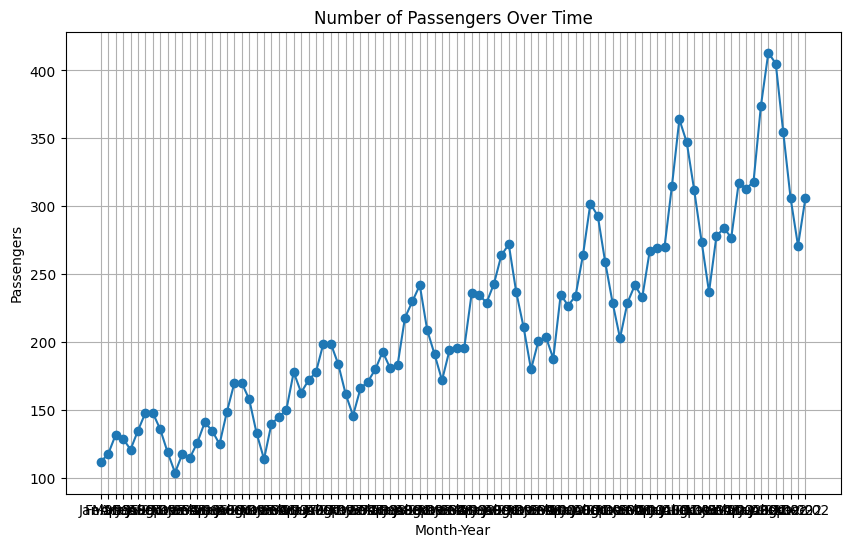

In [7]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Passengers'], marker='o', linestyle='-')
plt.title('Number of Passengers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [8]:
len(df)

96

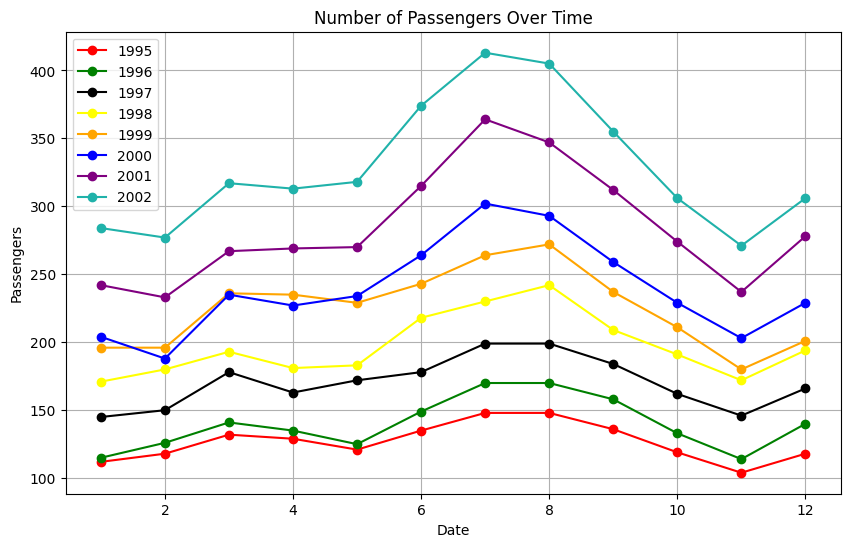

In [9]:
plt.figure(figsize=(10, 6))
a=range(1,13)
df1=df.iloc[0:12,:]
plt.plot(a,df1['Passengers'],label='1995', color='red', marker='o', linestyle='-')

df1=df.iloc[12:24,:]
plt.plot( a,df1['Passengers'],label='1996', color='green', marker='o', linestyle='-')

df1=df.iloc[24:36,:]
plt.plot(a,df1['Passengers'],label='1997', color='black', marker='o', linestyle='-')

df1=df.iloc[36:48,:]
plt.plot( a,df1['Passengers'],label='1998', color='yellow', marker='o', linestyle='-')

df1=df.iloc[48:60,:]
plt.plot( a,df1['Passengers'],label='1999', color='orange', marker='o', linestyle='-')

df1=df.iloc[60:72,:]
plt.plot( a,df1['Passengers'],label='2000', color='blue', marker='o', linestyle='-')

df1=df.iloc[72:84,:]
plt.plot( a,df1['Passengers'],label='2001', color='Purple', marker='o', linestyle='-')

df1=df.iloc[84:96,:]
plt.plot( a,df1['Passengers'],label='2002', color='lightseagreen', marker='o', linestyle='-')

plt.title('Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()  # Add legend to distinguish between lines
plt.grid(True)
plt.show()

In [40]:
from sklearn.ensemble import IsolationForest
# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier'] = isolation_forest.fit_predict(df[['Passengers']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


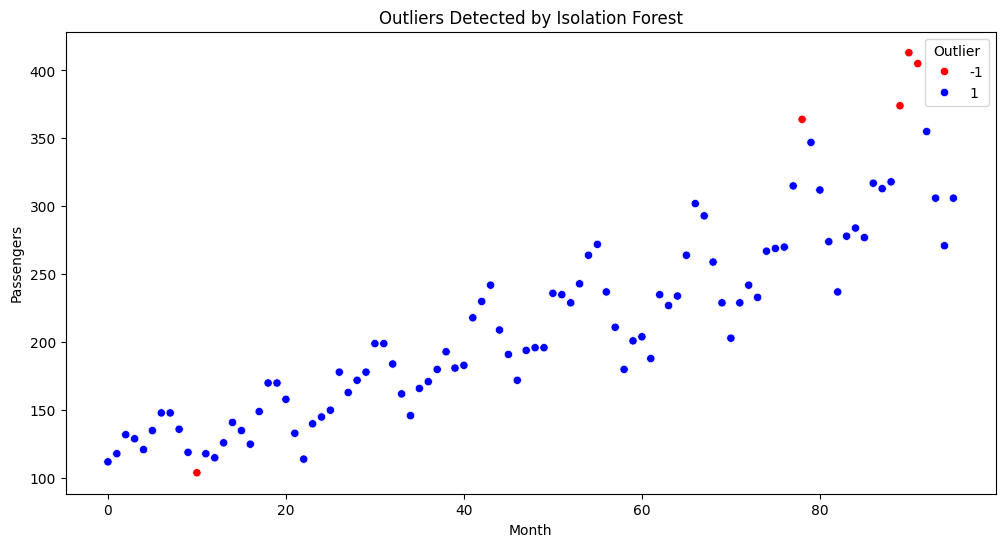

In [11]:
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.scatterplot(x=df.index, y='Passengers', hue='Outlier', data=df, palette={1: 'blue', -1: 'red'})
plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend(title='Outlier')

plt.show()

In [41]:
df_no_outliers = df[df['Outlier'] == 1].copy()
df_no_outliers = df_no_outliers.drop('Outlier', axis=1)


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df_train, df_test = train_test_split(df_no_outliers, test_size=0.2, shuffle=False)

train_passenger = df_train['Passengers']
test_passenger = df_test['Passengers']



In [14]:
# Fit the model on the training data
model = ExponentialSmoothing(train_passenger, seasonal='add', seasonal_periods=12, trend='add')
results = model.fit()
# Forecast for the test period
forecast_steps = len(df_test)
forecast = results.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_passenger, forecast))
print(f"RMSE: {rmse}")

RMSE: 31.59681278441187


The data exhibits seasonality and trend, as can be understood by the plots


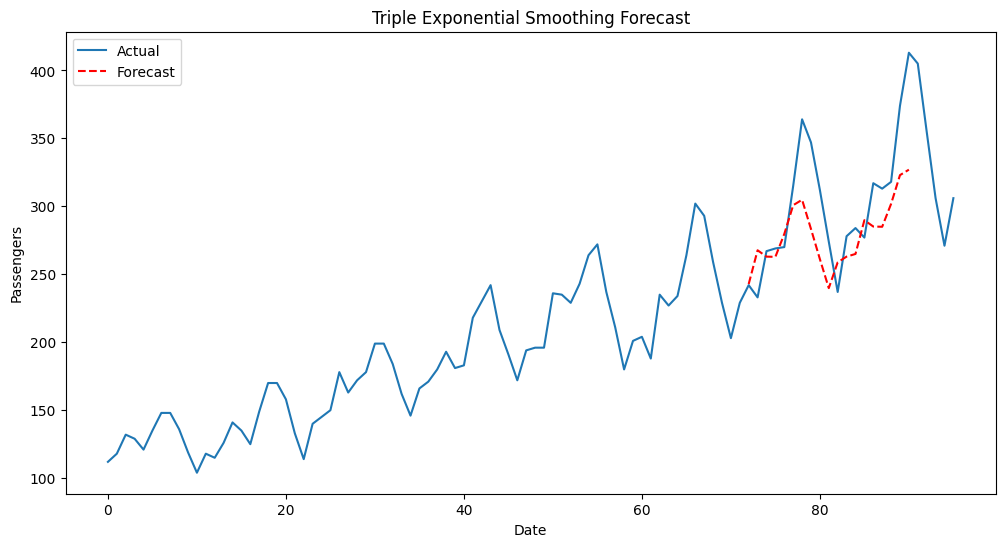

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Triple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [17]:
#naive Forecast
naive_forecast = np.repeat(df_train['Passengers'].iloc[-1], len(df_test))
actual_values = df_test['Passengers']
# Calculate RMSE for the naive forecast
naive_rmse = np.sqrt(mean_squared_error(actual_values, naive_forecast))
print(f"Naive Forecast RMSE: {naive_rmse}")

Naive Forecast RMSE: 59.405386961116584


In [18]:
#moving average forecast
window_size = 3
moving_avg_forecast = df_train['Passengers'].rolling(window=window_size).mean()
moving_avg_forecast = moving_avg_forecast.dropna()
actual_values = df_test['Passengers']

In [19]:
# Repeat the last observed moving average value for the length of the testing set
moving_avg_forecast = pd.Series(moving_avg_forecast)
moving_avg_forecast = np.repeat(moving_avg_forecast.iloc[-1], len(df_test))
actual_values = df_test['Passengers']
# Ensure that both forecast and actual have the same length
moving_avg_forecast = moving_avg_forecast[:len(actual_values)]
# Calculate RMSE for the moving average forecast
moving_avg_rmse = np.sqrt(mean_squared_error(actual_values, moving_avg_forecast))
print(f"Moving Average Forecast RMSE: {moving_avg_rmse}")

Moving Average Forecast RMSE: 74.59626223331358


In [ ]:
'''The model used used for forecasting the data is Holt winter's Exponential smoothing, which has an rmse of 37.7325184683014 , compare to
RMSE for moving average forecast( 75.81475963015235) and for Naive forecast ( 66.15512073906298) this is considerably low.
Compare to the scale of the data (bw 104-413), this error is acceptable. '''

"The model used used for forecasting the data is Holt winter's Exponential smoothing, which has an rmse of 37.7325184683014 , compare to \nRMSE for moving average forecast( 75.81475963015235) and for Naive forecast ( 66.15512073906298) this is considerably low. \nCompare to the scale of the data (bw 104-413), this error is acceptable. "

In [20]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [21]:
import pmdarima as pm
from pmdarima import auto_arima
train_size = int(len(df_no_outliers) * 0.8)
train, test = df_no_outliers['Passengers'][:train_size], df_no_outliers['Passengers'][train_size:]


In [22]:
# Perform auto ARIMA with hyperparameter tuning
model = auto_arima(train, seasonal=True, suppress_warnings=True)
forecast_steps = len(test)
forecast = model.predict(n_periods=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3586.39


In [24]:
# Fit SARIMA model
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # seasonal period

hyperparameter_grid = list(itertools.product(p, d, q, P, D, Q))
best_mse = float('inf')
best_params = None

for params in hyperparameter_grid:
    order = (params[0], params[1], params[2])
    seasonal_order = (params[3], params[4], params[5], s)

    # Fit SARIMA model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fit_model = model.fit(disp=False)

    # Forecast
    forecast_steps = len(test)
    forecast = fit_model.get_forecast(steps=forecast_steps).predicted_mean

    # Calculate MSE
    mse = mean_squared_error(test, forecast)

    # Update best parameters if MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_params = params


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

In [25]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Squared Error: {best_mse:.2f}")

Best Hyperparameters: (0, 1, 0, 1, 0, 0)
Best Mean Squared Error: 903.05


In [29]:
'''df_no_outliers['Month'] = pd.to_datetime(df_no_outliers['Month'], format='%b-%y')
df_no_outliers['Month'] = df_no_outliers['Month'].dt.month
df_no_outliers['Year'] = df_no_outliers['Month'].dt.year
X = df_no_outliers[['Month', 'Year']]
y = df_no_outliers['Passengers']'''

"df_no_outliers['Month'] = pd.to_datetime(df_no_outliers['Month'], format='%b-%y')\ndf_no_outliers['Month'] = df_no_outliers['Month'].dt.month\ndf_no_outliers['Year'] = df_no_outliers['Month'].dt.year\nX = df_no_outliers[['Month', 'Year']]\ny = df_no_outliers['Passengers']"

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_no_outliers['year-month'] = pd.to_datetime(df_no_outliers['year-month'])
# Extract months
df_no_outliers['Month'] = df_no_outliers['year-month'].dt.month
label_encoder = LabelEncoder()
df_no_outliers['Month_encoded'] = label_encoder.fit_transform(df_no_outliers['Month'])


In [47]:
df_no_outliers.head()


,Month,Passengers,years,year-month,Month_encoded
0,1,112,1995,1995-01-01,0
1,2,118,1995,1995-02-01,1
2,3,132,1995,1995-03-01,2
3,4,129,1995,1995-04-01,3
4,5,121,1995,1995-05-01,4


In [48]:
X = df_no_outliers[['years','Month_encoded']]
y = df_no_outliers['Passengers']
train_size = int(len(df_no_outliers) * 0.8)
train, test = df_no_outliers.iloc[:train_size], df_no_outliers.iloc[train_size:]
X_train, y_train = train[['years']], train['Passengers']
X_test, y_test = test[['years']], test['Passengers']


In [51]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100,
                                   scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}


In [52]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3766.68


In [50]:
# Initialize Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 59.407669166330315


In [53]:
'''Accuracy of the models:
ExponentialSmoothing RMSE: 31.59681278441187
Naive Forecast RMSE: 59.405386961116584
Moving Average Forecast RMSE: 74.59626223331358
ARIMA Mean Squared Error: 3586.39
SARIMA Best Mean Squared Error: 903.05
Random forest Mean Squared Error: 3766.68
Gradient Boosting RMSE: 59.407669166330315
'''


'Accuracy of the models:\nExponentialSmoothing RMSE: 31.59681278441187\nNaive Forecast RMSE: 59.405386961116584\nMoving Average Forecast RMSE: 74.59626223331358\nARIMA Mean Squared Error: 3586.39\nSARIMA Best Mean Squared Error: 903.05\nRandom forest Mean Squared Error: 3766.68\nGradient Boosting RMSE: 59.407669166330315\n'

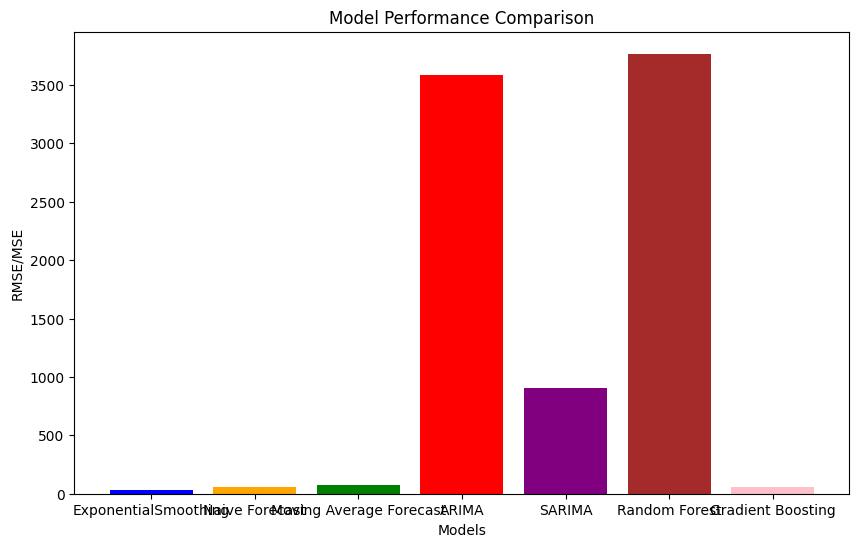

In [54]:
# Models and their respective RMSE/MSE values
models = ['ExponentialSmoothing', 'Naive Forecast', 'Moving Average Forecast', 'ARIMA', 'SARIMA', 'Random Forest', 'Gradient Boosting']
errors = [31.60, 59.41, 74.60, 3586.39, 903.05, 3766.68, 59.41]  # Replace with your actual values

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, errors, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE/MSE')
plt.show()

In [ ]:
'''The best model is ExponentialSmoothing with RMSE: 31.59681278441187'''